This notebook is given by Alex Li to generate confusion matrices using the output energy tables from different models.

In [1]:
!pip install --user pillow

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import pickle
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import sklearn
print(sklearn.__version__)

mpl.rcParams.update(
    {'font.size': 24, 
     'axes.labelsize': 'medium', 
     'axes.titlesize': 'medium', 
     'legend.fontsize': 18})


# mpl.rcParams.update(
#     {'font.size': 24, 
#      'axes.labelsize': 'medium', 
#      'axes.titlesize': 'medium', 
#      'legend.fontsize': 18, 
#      'font.family': 'sans-serif', 
#      'font.sans-serif':'Helvetica'})

# mpl.font_manager.fontManager.addfont("/home/gridsan/alexjli/TERMinator/analysis/Helvetica.ttf")
# plt.rcParams['font.family'] = 'sans-serif'
# plt.rcParams['font.sans-serif'] = 'Helvetica'

1.0.1


In [3]:
def plot_confusion_matrix(run_name):
    alphabet = ['D', 'E', 'K', 'R', 'H', 'Q', 'N', 'S', 'T', 'P', 'G', 'A', 'V', 'I', 'L', 'M', 'C', 'F', 'W', 'Y', 'X']
    """letter_to_num = {'C': 4, 'D': 3, 'S': 15, 'Q': 5, 'K': 11, 'I': 9,
               'P': 14, 'T': 16, 'F': 13, 'A': 0, 'G': 7, 'H': 8,
               'E': 6, 'L': 10, 'R': 1, 'W': 17, 'V': 19,
               'N': 2, 'Y': 18, 'M': 12, 'X': 20}"""
    letter_to_num = {char: alphabet.index(char) for char in alphabet}
    def seq_to_arr(seq):
        ret = np.array([letter_to_num[char] for char in seq.strip()])
        return ret
    
    fig, axs = plt.subplots(1, 2, figsize=(20, 8))

    pred = []
    native = []
    for suffix in ["_run0", "_run1", "_run2"]:
        df_fold = pd.read_csv(f'/home/gridsan/groups/keatinglab/alexjli/refactor_dirs/data/pub_outs/ablation_studies/ingraham_{run_name}{suffix}/summary_results.csv')
        pred += df_fold.pred_sequences.apply(seq_to_arr).tolist()
        native += df_fold.real_sequences.apply(seq_to_arr).tolist()
             
    pred = np.concatenate(pred)
    native = np.concatenate(native)
    cm = confusion_matrix(pred, native, normalize='true')
    
    cmap = "Reds"
    cm_plot = ConfusionMatrixDisplay(cm,
                                     display_labels=letter_to_num)
    axs[0].set_title("Ingraham Set")
    cm_plot.plot(ax=axs[0], include_values=False, cmap=cmap, colorbar=False)
    yticks = axs[0].get_yticks()
    ticks_loc = axs[0].get_yticks().tolist()
    axs[0].set_yticks(ticks_loc)
    
    #axs[0].set_yticklabels(ticks_loc)
    plt.setp(axs[0].get_yticklabels(), ha='center', position=(-0.025,0))
    axs[0].set_yticks(yticks)
    axs[0].set_ylabel(None)
    axs[0].set_xlabel(None)
    axs[0].get_images()[0].set_clim(vmin=0, vmax=1)
    
    pred = []
    native = []
    for suffix in ["_run0", "_run1", "_run2"]:
        df_fold = pd.read_csv(f'/home/gridsan/groups/keatinglab/alexjli/refactor_dirs/data/pub_outs/ablation_studies/multichain_{run_name}{suffix}/summary_results.csv')
        pred += df_fold.pred_sequences.apply(seq_to_arr).tolist()
        native += df_fold.real_sequences.apply(seq_to_arr).tolist()
             
    pred = np.concatenate(pred)
    native = np.concatenate(native)
    cm = confusion_matrix(pred, native, normalize='true')
    
    cmap = "Reds"
    cm_plot = ConfusionMatrixDisplay(cm,
                                     display_labels=letter_to_num)
    axs[1].set_title("Multichain Set")
    cm_plot.plot(ax=axs[1], include_values=False, cmap=cmap, colorbar=False)
    axs[1].set_ylabel(None)
    axs[1].set_xlabel(None)
    plt.setp(axs[1].get_yticklabels(), ha='center', position=(-0.025,0))
    axs[1].get_images()[0].set_clim(vmin=0, vmax=1)
    
    print(plt.gca().get_images())
    
    fig.colorbar(plt.gca().get_images()[0], ax=axs, label="Percent Counts")
    fig.suptitle("Residue Confusion Normalized by True Labels", position=(0.435, 1))
    xlabel = fig.supxlabel('Predicted Labels', fontsize=22, position=(0.435, 0.02))
    ylabel = fig.supylabel('True Labels', fontsize=22, position=(0.07, 0.5))
    plt.savefig(f'{run_name}_conf_mat.eps')
    
    

<a list of 1 AxesImage objects>


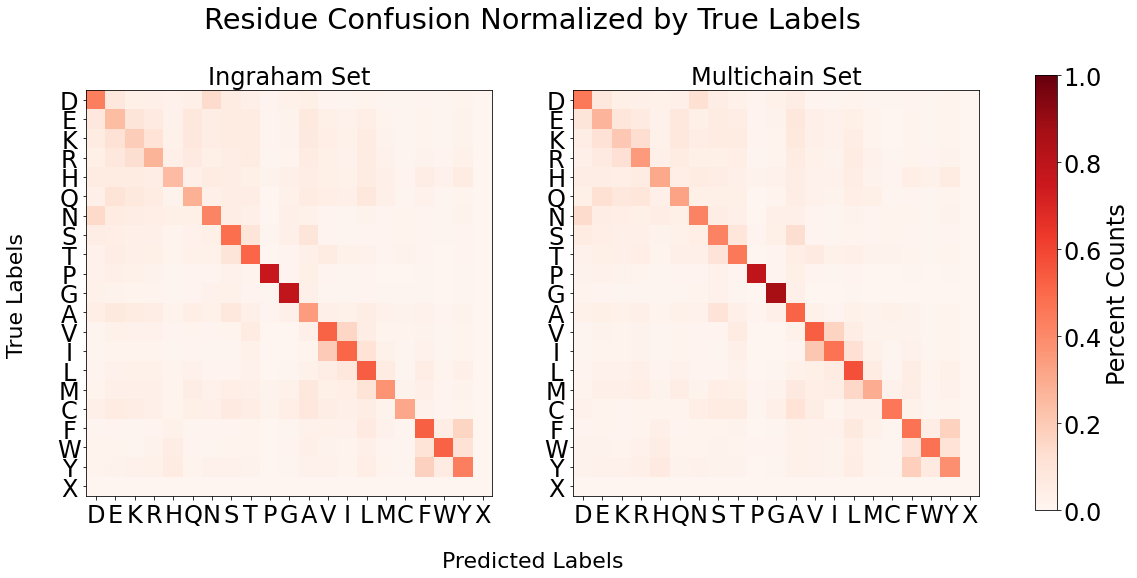

In [4]:
plot_confusion_matrix("asf")

In [9]:
def plot_confusion_matrix(fold1, fold2):
    alphabet = ['D', 'E', 'K', 'R', 'H', 'Q', 'N', 'S', 'T', 'P', 'G', 'A', 'V', 'I', 'L', 'M', 'C', 'F', 'W', 'Y', 'X']
    """letter_to_num = {'C': 4, 'D': 3, 'S': 15, 'Q': 5, 'K': 11, 'I': 9,
               'P': 14, 'T': 16, 'F': 13, 'A': 0, 'G': 7, 'H': 8,
               'E': 6, 'L': 10, 'R': 1, 'W': 17, 'V': 19,
               'N': 2, 'Y': 18, 'M': 12, 'X': 20}"""
    letter_to_num = {char: alphabet.index(char) for char in alphabet}
    def seq_to_arr(seq):
        ret = np.array([letter_to_num[char] for char in seq.strip()])
        return ret
    
    fig, axs = plt.subplots(1, 2, figsize=(20, 8))

    pred = []
    native = []
    for suffix in ["run0", "run1", "run2"]:
        df_fold = pd.read_csv(f'/home/gridsan/groups/keatinglab/mlu/tuning/triplicate_nsr/{fold1}/{suffix}/summary_results.csv')
        pred += df_fold.pred_sequences.apply(seq_to_arr).tolist()
        native += df_fold.real_sequences.apply(seq_to_arr).tolist()
             
    pred = np.concatenate(pred)
    native = np.concatenate(native)
    cm = confusion_matrix(pred, native, normalize='true')
    
    cmap = "Reds"
    cm_plot = ConfusionMatrixDisplay(cm,
                                     display_labels=letter_to_num)
    axs[0].set_title(f"{fold1} Set")
    cm_plot.plot(ax=axs[0], include_values=False, cmap=cmap, colorbar=False)
    yticks = axs[0].get_yticks()
    ticks_loc = axs[0].get_yticks().tolist()
    axs[0].set_yticks(ticks_loc)
    
    #axs[0].set_yticklabels(ticks_loc)
    plt.setp(axs[0].get_yticklabels(), ha='center', position=(-0.025,0))
    axs[0].set_yticks(yticks)
    axs[0].set_ylabel(None)
    axs[0].set_xlabel(None)
    axs[0].get_images()[0].set_clim(vmin=0, vmax=1)
    
    pred = []
    native = []
    for suffix in ["run0", "run1", "run2"]:
        df_fold = pd.read_csv(f'/home/gridsan/groups/keatinglab/mlu/tuning/triplicate_nsr/{fold2}/{suffix}/summary_results.csv')
        pred += df_fold.pred_sequences.apply(seq_to_arr).tolist()
        native += df_fold.real_sequences.apply(seq_to_arr).tolist()
             
    pred = np.concatenate(pred)
    native = np.concatenate(native)
    cm = confusion_matrix(pred, native, normalize='true')
    
    cmap = "Reds"
    cm_plot = ConfusionMatrixDisplay(cm,
                                     display_labels=letter_to_num)
    axs[1].set_title(f"{fold2} Set")
    cm_plot.plot(ax=axs[1], include_values=False, cmap=cmap, colorbar=False)
    axs[1].set_ylabel(None)
    axs[1].set_xlabel(None)
    plt.setp(axs[1].get_yticklabels(), ha='center', position=(-0.025,0))
    axs[1].get_images()[0].set_clim(vmin=0, vmax=1)
    
    print(plt.gca().get_images())
    
    fig.colorbar(plt.gca().get_images()[0], ax=axs, label="Percent Counts")
    fig.suptitle("Residue Confusion Normalized by True Labels", position=(0.435, 1))
    xlabel = fig.supxlabel('Predicted Labels', fontsize=22, position=(0.435, 0.02))
    ylabel = fig.supylabel('True Labels', fontsize=22, position=(0.07, 0.5))
#     plt.savefig(f'{run_name}_conf_mat.eps')
    
    

<a list of 1 AxesImage objects>


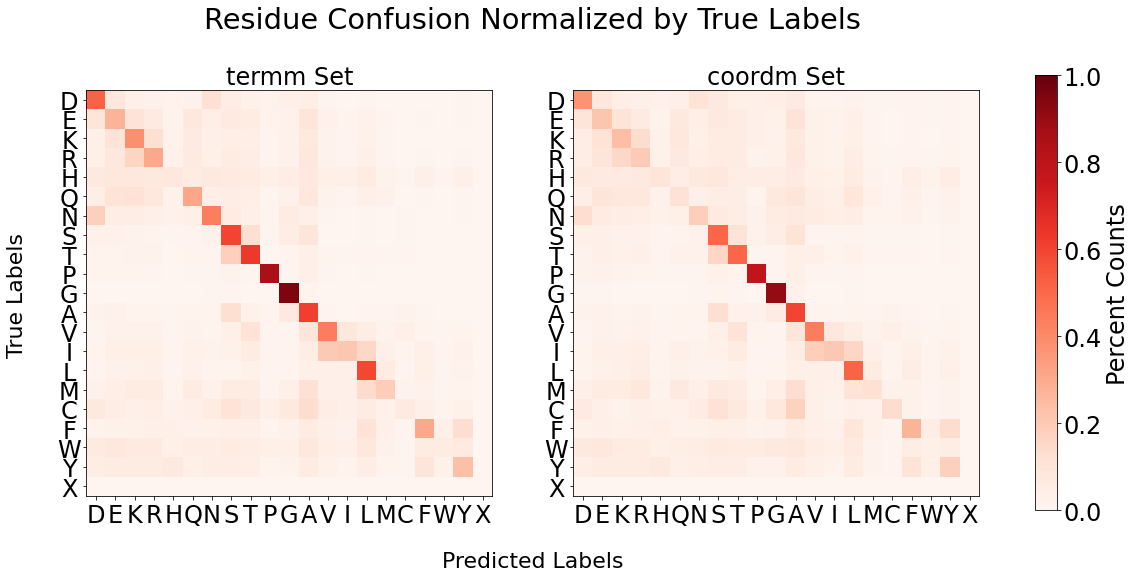

In [10]:
plot_confusion_matrix('termm', 'coordm')

<a list of 1 AxesImage objects>


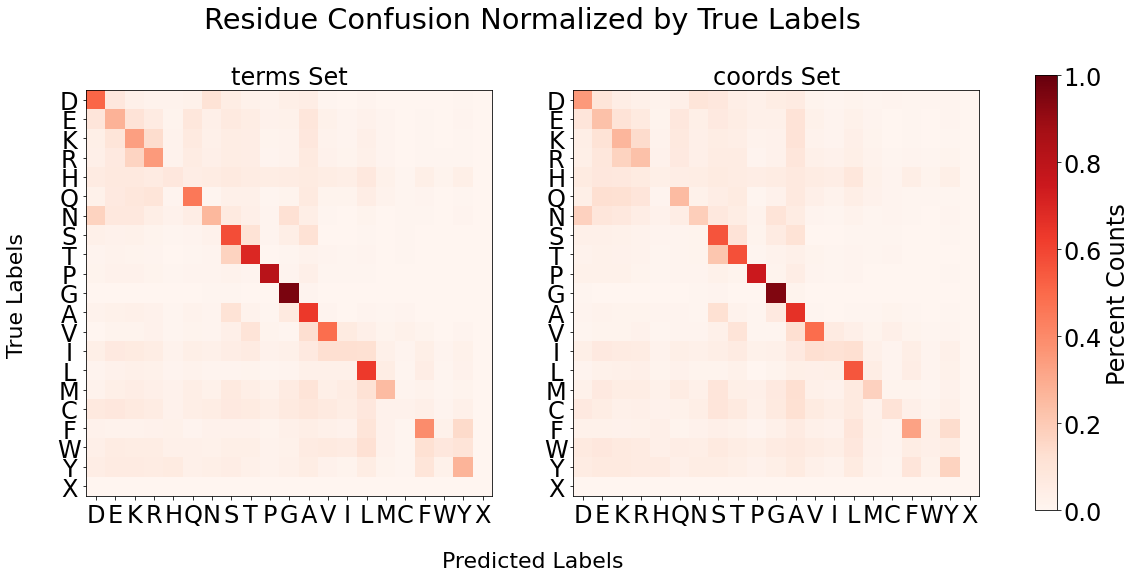

In [11]:
plot_confusion_matrix('terms', 'coords')